In [1]:
import pandas as pd
import numpy as np
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis', 
                    model='arpanghoshal/EmoRoBERTa', device=0)

emotion_labels = emotion("Thanks for using it.")
print(emotion_labels)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


[{'label': 'gratitude', 'score': 0.9964383840560913}]


In [5]:
%time
emotion_labels = emotion("Thanks for using it.")

CPU times: total: 0 ns
Wall time: 0 ns


In [6]:
def get_emotion_label(text):
    return(emotion(text)[0]['label'])

In [7]:
data = pd.read_excel("Hurricane_Harvey.xlsx")
# sample = data["Tweet"][1:10].apply(get_emotion_label)
data["Tweet"] = data["Tweet"].astype(str)

In [8]:
from tqdm import tqdm

labels = []

tweets = data["Tweet"].tolist()

batch_tweets = []
idx = 0
batch = 8
while True:
    batch_tweets.append(tweets[idx:idx+batch])
    idx += batch
    if idx > len(tweets):
        break

In [9]:
emotion(batch_tweets[0])

[{'label': 'approval', 'score': 0.5069989562034607},
 {'label': 'caring', 'score': 0.7742028832435608},
 {'label': 'neutral', 'score': 0.992408275604248},
 {'label': 'desire', 'score': 0.8393666744232178},
 {'label': 'neutral', 'score': 0.9950125813484192},
 {'label': 'neutral', 'score': 0.5207667946815491},
 {'label': 'disapproval', 'score': 0.7265138030052185},
 {'label': 'neutral', 'score': 0.9965454936027527}]

In [10]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
with tf.device('/device:GPU:0'):
    labels = []
    for item in tqdm(batch_tweets, desc="Processed"):
        preds = [lb['label'] for lb in emotion(item)]
        labels += preds

Processed: 100%|███████████████████████████████████| 49926/49926 [11:11:19<00:00,  1.24it/s]


In [12]:
data["Emotion"] = np.array(labels)

In [13]:
data.to_csv('Harvey_dataframe.csv',index=False)

Text(0.5, 1.0, 'Emotion Distribution')

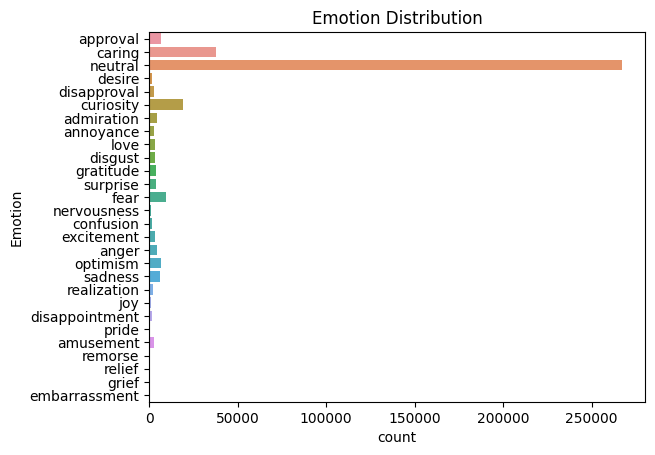

In [14]:
sns.countplot(data = data, y = 'Emotion').set_title("Emotion Distribution")